# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries



In [59]:
import pandas as pd 

## Get the Data


In [86]:
ad_data = pd.read_csv('advertising.csv')

In [87]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [88]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [89]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis



In [90]:
import seaborn as sbn
import matplotlib.pyplot as plt

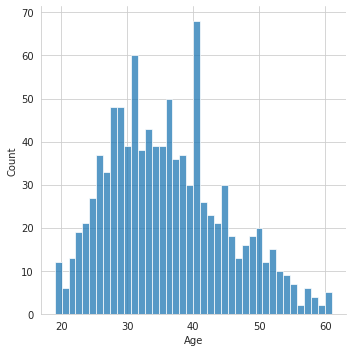

In [110]:
sbn.set_style('whitegrid')
sbn.displot(ad_data['Age'], bins = 40)

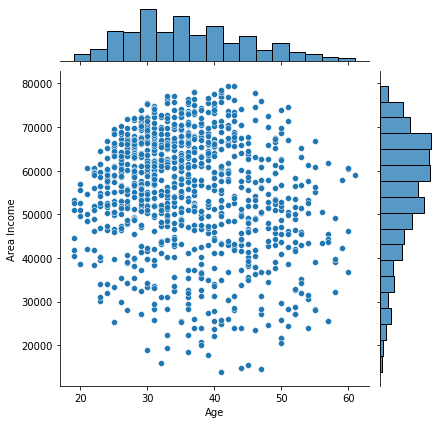

In [92]:
sbn.jointplot(data = ad_data, x = 'Age', y = 'Area Income')

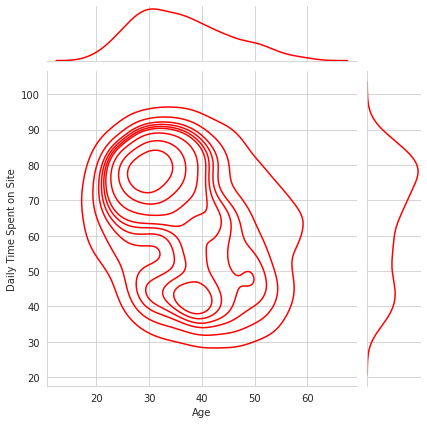

In [111]:
sbn.jointplot(data = ad_data, x = 'Age', y = 'Daily Time Spent on Site', kind = 'kde', color = 'red')

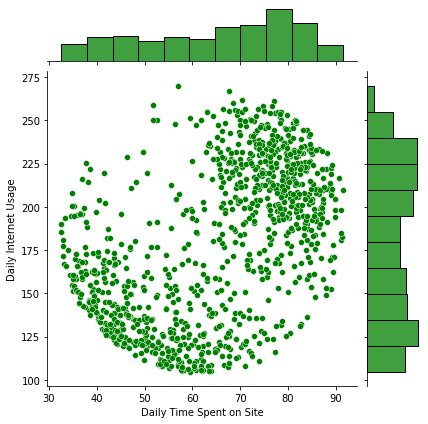

In [94]:
sbn.jointplot(data = ad_data, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', color = 'green')

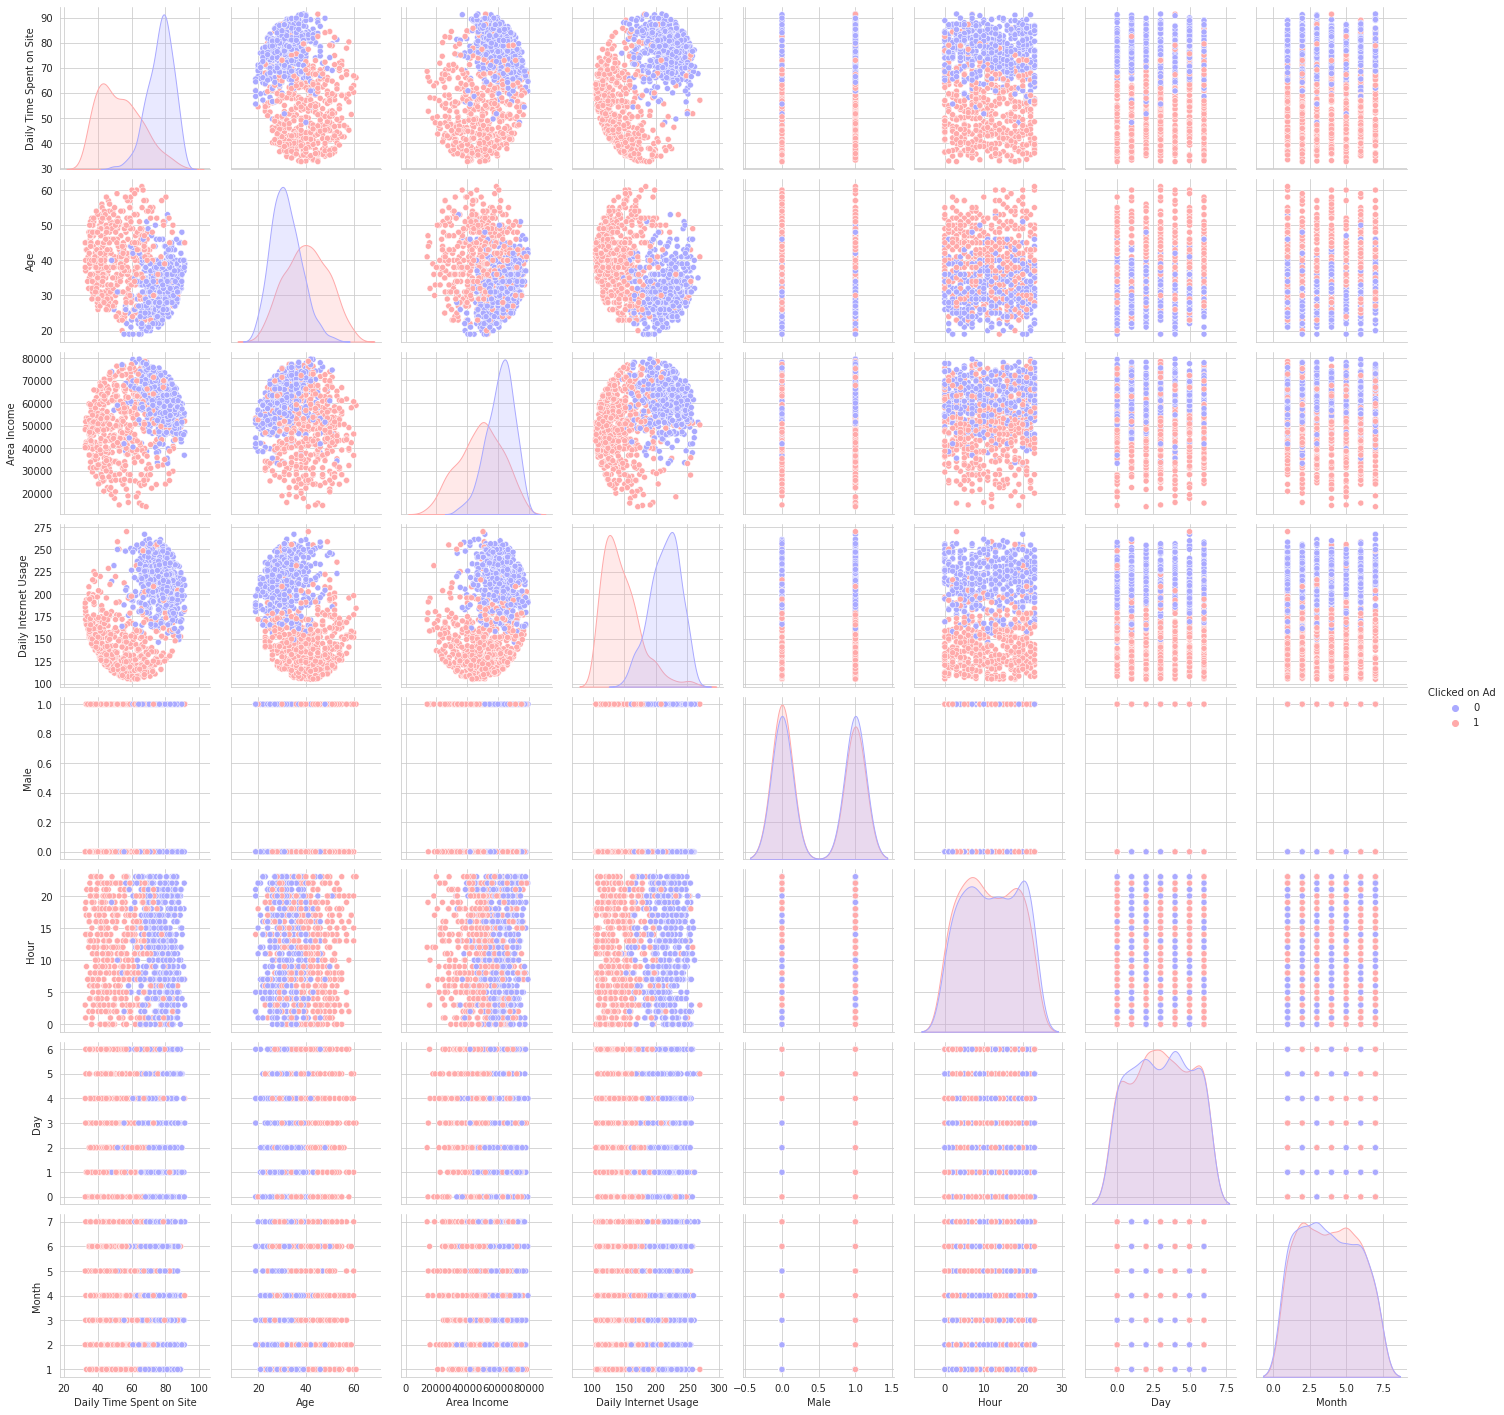

In [112]:
sbn.pairplot(data = ad_data, hue = 'Clicked on Ad', palette = 'bwr')

# Logistic Regression



In [96]:
ad_data['Ad Topic Line'].unique().size

1000

In [97]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])
ad_data['Hour'] = ad_data['Timestamp'].apply(lambda x: x.hour)
ad_data['Day'] = ad_data['Timestamp'].apply(lambda x: x.dayofweek)
ad_data['Month'] = ad_data['Timestamp'].apply(lambda x: x.month)
ad_data['Year'] = ad_data['Timestamp'].apply(lambda x: x.year)

In [98]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int64         
 11  Day                       1000 non-null   int64         
 12  Month                

In [99]:
ad_data.drop('Ad Topic Line', axis = 1, inplace = True)


In [100]:
ad_data.drop('Year', axis = 1, inplace = True)
ad_data.drop('Timestamp', axis = 1, inplace = True)
ad_data.drop('City', axis = 1, inplace = True)
ad_data.drop('Country', axis = 1, inplace = True)

In [101]:
X = ad_data.drop('Clicked on Ad', axis = 1)
y = ad_data['Clicked on Ad']

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Hour                      1000 non-null   int64  
 6   Day                       1000 non-null   int64  
 7   Month                     1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [103]:
from sklearn.model_selection import train_test_split as tst
X_train, X_test, y_train, y_test = tst(X, y, test_size=0.3, random_state=101)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
logModel = LogisticRegression()


In [105]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)

0.9766666666666667

In [106]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [107]:
yPred = logModel.predict(X_test)

In [108]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [109]:
print(classification_report(y_test, yPred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       157
           1       0.94      0.87      0.91       143

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

